   #                        NO SHOW APPOINTMENTS

# Project: Investigate a Dataset - No Show

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset contains 110,527 appointments in various hospitals across neighborhoods in Brazil. This include 14 characteristics to show the relationships and details of patients in order to determine why they are present on their appointments or why not. The different columns are represented below showing what attribute is associated with each columns.

 PatientId - Identification of a patient
    
 AppointmentID -Identification of each appointment

 Gender -Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
    
 Age- How old is the patient.

 Neighbourhood-Where the appointment takes place.
    
 Scholarship - True or False . To know if the patient is enrolled in Bolsa Familia

 Hipertension - True or False. To know if the patient is hypertensive or not
    
 Diabetes - True or False. This shows true when diabetic but false when not

 Alcoholism - True or False. This shows true when alcoholic but false when not
    
 Handcap - True or False. This shows true when alcoholic but false when not

 SMS_received - 1 or more messages sent to the patient.
    
 No-show- True or False. When patients shows up, a false is displayed but true is displayed when patients did not.

N.B: All True or False is represented as boolean values 0 for false and 1 for True
### Questions for Analysis
Q1: How many appointments were attended
    
Q2:How many of the appointments were patients reminded of?
    
Q3: Does disability or health condition affect attendance?
    
Q4: What is the gender difference for attendance?
    
Q5: What hospital has the most appointments?


<a id='wrangling'></a>
## Data Wrangling

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading the data
df_ns = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df_ns.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#An overview of data type and total non-null values
df_ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#checking for null values
df_ns.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
#checking the values contained in the handicap column
df_ns['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [7]:
#checking the values contained in theSMS_received column
df_ns['SMS_received'].unique()

array([0, 1], dtype=int64)

## Cleaning Data
#### Here, we replace handicap with a bool type 0 and 1 data so as to indicate if handicapped or not while 0-4 is changed to number of times sms was received

In [8]:
# column rename to switch sms_received and handicap
df_ns.rename(columns={'SMS_received':'Handcap','Handcap':'SMS_received'}, inplace=True)

In [9]:
df_ns.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Handcap,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# removing appointment day from the data as it can not be compared with scheduled_day
df_ns.drop('AppointmentDay',axis =1,inplace=True)

In [11]:
df_ns.head()

,PatientId,AppointmentID,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Handcap,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### split the schedule day to date and time

In [12]:
#changing data type of scheduled day and splitting to date and time
df_ns['Schedule_Date'] = pd.to_datetime(df_ns['ScheduledDay']).dt.date
df_ns['Schedule_Time'] = pd.to_datetime(df_ns['ScheduledDay']).dt.time

In [13]:
df_ns.head()

,PatientId,AppointmentID,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Handcap,No-show,Schedule_Date,Schedule_Time
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23


In [14]:
cols = list(df_ns.columns.values)
print (cols)

['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'Handcap', 'No-show', 'Schedule_Date', 'Schedule_Time']


In [15]:
df_ns = df_ns[['PatientId', 'AppointmentID', 'Gender', 'Schedule_Date', 'Schedule_Time', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show' ]]

In [16]:
df_ns.head()

,PatientId,AppointmentID,Gender,Schedule_Date,Schedule_Time,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Eliminating bad spellings and renaming

In [17]:
#using  rename function to change spellings
df_ns.rename(columns={'PatientId':'patient_id','AppointmentID':'appointment_id','Hipertension':'hypertension','Handcap':'handicap','No-show':'no_show'},inplace=True)

In [18]:
df_ns.head()

,patient_id,appointment_id,Gender,Schedule_Date,Schedule_Time,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,handicap,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Putting all attributes (column headers) as lowercase

In [19]:
# changing all headers to lowercase with rename
df_ns= df_ns.rename(columns=str.lower)

In [20]:
df_ns.head()

,patient_id,appointment_id,gender,schedule_date,schedule_time,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### It is necessary to replace the float data type of the first column to int64 so as to view properly and identify how many appointments is allocated to a patient

In [21]:
#using astype to rename to integer
df_ns['patient_id']=df_ns['patient_id'].astype('int64')

In [22]:
df_ns.head()

,patient_id,appointment_id,gender,schedule_date,schedule_time,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [23]:
#statistical summary of the dataset
df_ns.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.321026,0.022248
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.466873,0.161543
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


<a id='eda'></a>
## Exploratory Data Analysis

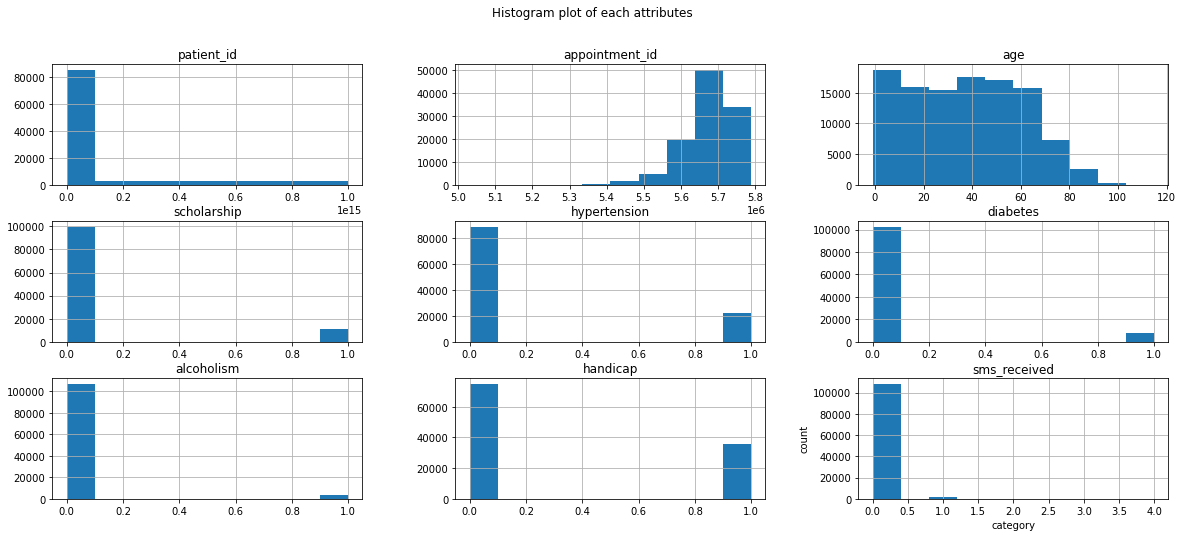

In [24]:
#Using histogram to analyze data
df_ns.hist(figsize=(20,8));
plt.xlabel('category')
plt.ylabel('count')
plt.suptitle('Histogram plot of each attributes')
plt.show()

The set of histogram shows the summary of each categorical data in the columns, it shows count of age, scholarship,hypertension,alcoholism, handicap and sms_received.

## Q1: How many appointments were attended

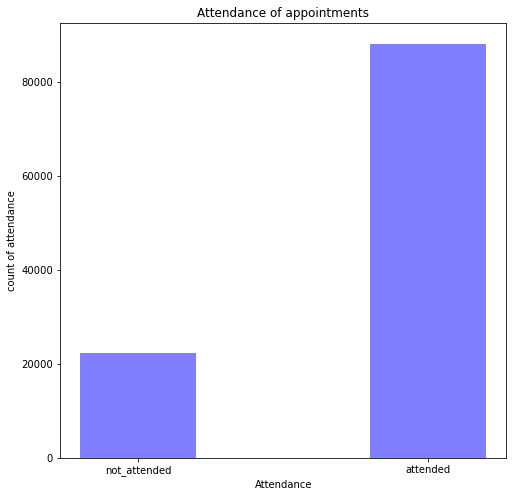

In [25]:
#we find the plot of patients that showed up and those that did not
not_attended=df_ns.query("no_show=='Yes'")
attended=df_ns.query("no_show=='No'")
fig=plt.figure(figsize=(8,8))
plt.bar(['not_attended','attended'],[not_attended.no_show.count(),attended.no_show.count()],alpha=.5,color='blue',width=0.4)
plt.xlabel("Attendance")
plt.ylabel("count of attendance")
plt.title("Attendance of appointments")
plt.show()

In [26]:
#we found count of patients that showed up and those that did not
not_attended.no_show.count(),attended.no_show.count()

(22319, 88208)

The above analysis shows that the number of attended appointments is about 4 times of the unattended appointments.

## Q2:How many of the appointments were patients reminded of?

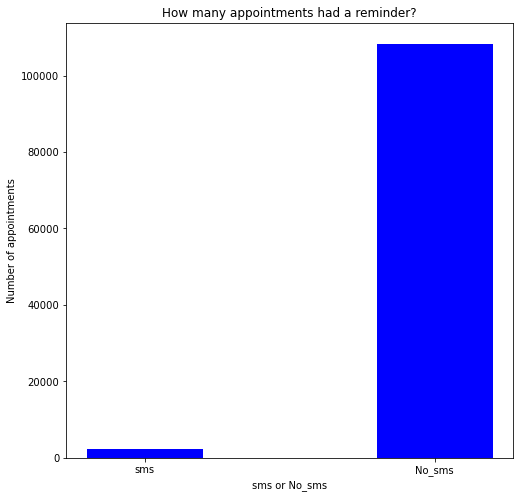

In [27]:
# define sms into received and not received using query
sms = df_ns.query("sms_received > 0")
No_sms = df_ns.query("sms_received == 0")
#plot of sms and no_sms on a bar chart
fig = plt.figure(figsize = (8, 8))
plt.bar(['sms','No_sms'], [sms.sms_received.count(),No_sms.sms_received.count()], color ='blue',width = 0.4)
plt.xlabel("sms or No_sms")
plt.ylabel("Number of appointments")
plt.title("How many appointments had a reminder?")
plt.show()

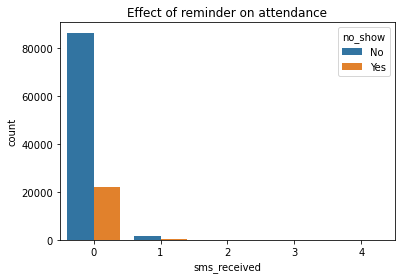

In [28]:
#Using countplot to define relationship between sms received and no_show
smss=sns.countplot(x='sms_received',hue='no_show',data=df_ns)
smss.set_title('Effect of reminder on attendance')
plt.show()

 There are a large number of people without (at least one) reminder but they still show up.

The above shows that majority of the patients did not get a reminder for the appointment and most of the patients did not have more than one reminder.

## Q3: Does disability or health condition affect attendance?

In [29]:
#Using query to separate hypertensive from those that are not
not_hypertensive = df_ns.query("hypertension == 0")
hypertensive = df_ns.query("hypertension == 1")
#To see the number of diabetic conditions
not_hypertensive.hypertension.count(),hypertensive.hypertension.count()

(88726, 21801)

<AxesSubplot:title={'center':'Effect of hypertension on attendance'}, xlabel='hypertension', ylabel='count'>

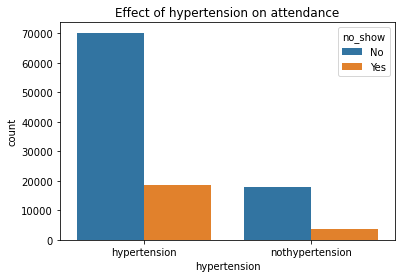

In [30]:
#Using countplot for analysis
def figure(z = "hypertension"):
    hypertension=sns.countplot(x= z,hue='no_show',data=df_ns)
    hypertension.set_title('Effect of' + ' '+ z + ' '+'on attendance')
    hypertension.set_xticklabels([z,'not' + z]);
    return hypertension
figure()

It is clear from the above that the level of people that did not show up either due to being hypertensive or not are at the same rate hence being hypertensive does not prevent showing up.

In [31]:
#Using query to separate diabetic patients from those that are not
not_diabetic = df_ns.query("diabetes == 0")
diabetic = df_ns.query("diabetes == 1")
#To see the number of diabetic conditions
diabetic.diabetes.count(),not_diabetic.diabetes.count()

(7943, 102584)

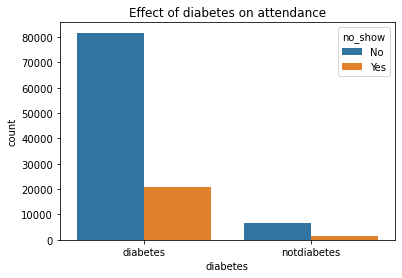

In [32]:
#Plot of no_show and diabetic conditions
diabetes = figure('diabetes')

It is clear from the above that the level of people that did not show up either due to being diabetic or not are at the same rate hence being diabetic does not prevent showing up.

In [33]:
#To query for handicapped and not_handicapped
not_handicapped = df_ns.query("handicap == 0")
handicapped = df_ns.query("handicap == 1")
#To see the number of handicap conditions
not_handicapped.handicap.count(),handicapped.handicap.count()

(75045, 35482)

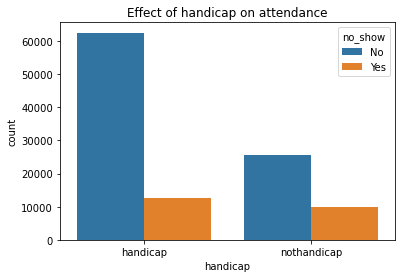

In [34]:
#Plot of no_show and handicap conditions
handicap = figure('handicap')

There are about 35,482 appointments scheduled by handicaps and about 7000 of the appointments were unattended  however a large number of this still shows up.

In [35]:
#Using query to sort alcoholic and non_alcoholic
not_alcoholic = df_ns.query("alcoholism == 0")
alcoholic = df_ns.query("alcoholism == 1")
#To see the number of alcoholic conditions
not_alcoholic.alcoholism.count(),alcoholic.alcoholism.count()

(107167, 3360)

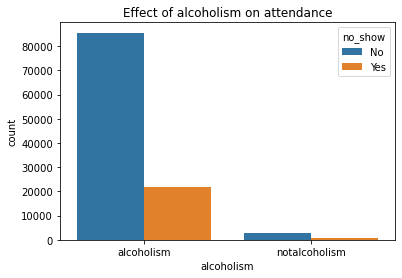

In [36]:
#plots of alcohol and non_alcoholic patients
alcohol = figure('alcoholism')

Although we have about 3360 people being alcoholic, showing that only a very few people that are alcoholic do not show up for appointment.

## Q4: What is the gender difference for attendance?

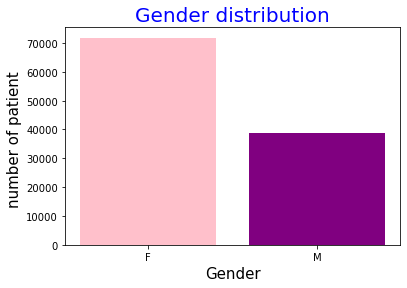

In [37]:
#How many appointments are there per gender
plt.bar(df_ns['gender'].value_counts().index[0],df_ns['gender'].value_counts().values[0],label='F',color='pink')
plt.bar(df_ns['gender'].value_counts().index[1],df_ns['gender'].value_counts().values[1],label='M',color='purple')
plt.xlabel('Gender',fontsize=15)
plt.ylabel('number of patient ',fontsize=15)
plt.title('Gender distribution',fontsize=20,color='b')
plt.show();

Female patients tend to book more appointments than the male hence they have the larger appointments.

## Q5: What hospital has the most appointments

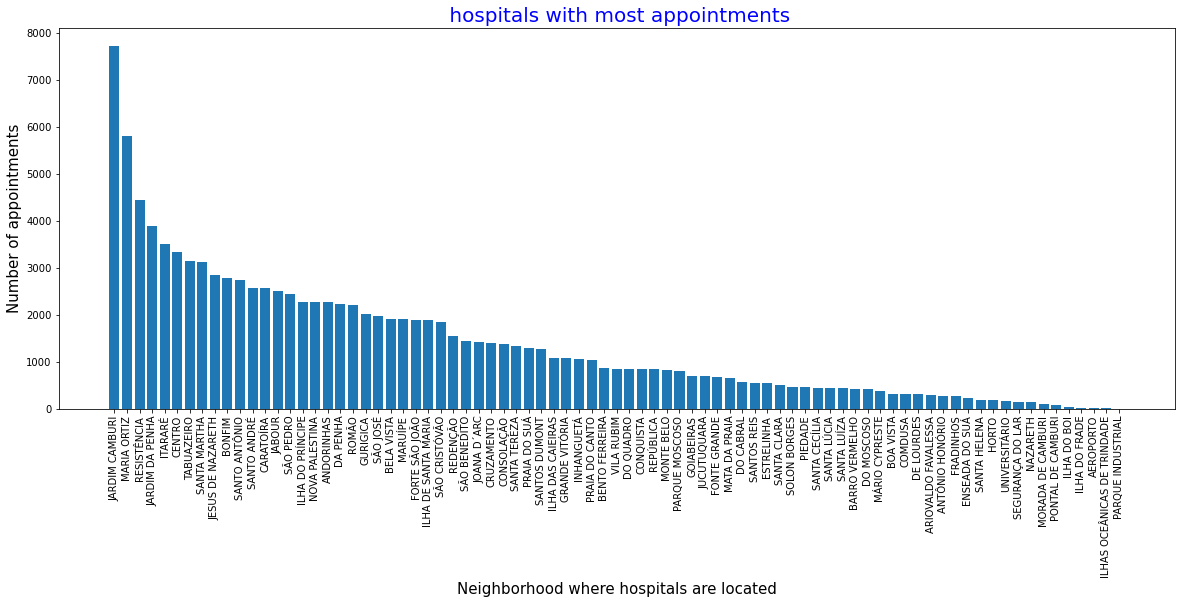

In [38]:
#plot to show number of appointment per neighborhood
hospital = df_ns['neighbourhood'].value_counts()
fig = plt.figure(figsize = (20, 7))
plt.bar(hospital.index,hospital.values)
plt.xlabel('Neighborhood where hospitals are located', fontsize=15)
plt.ylabel('Number of appointments',fontsize=15)
plt.xticks(rotation=90)
plt.title(' hospitals with most appointments',fontsize=20,color='b')
plt.show()

 Jardim Camburi is seen to be the hospital with most appointments while Parque is the least

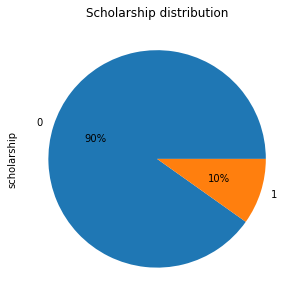

In [39]:
#plot of those with scholarship and those without
df_ns['scholarship'].value_counts().plot(kind='pie', title = 'Scholarship distribution', autopct='%1.0f%%', figsize = [20,5]);

Only 10% of the appointments is based on scholarship or sponsored by Bosla Familia

<a id='conclusions'></a>
## Conclusions

1. There was little follow up on appointments to remind patients of their scheduled date.

2. There are more attended appointments than the unattended once

3. Disability, defect or health conditions in some cases prone people to even attend their appointments more.

4. There are more women with appointments than men.

5. Only 10% of the appointments were not sponsored by the scholarships.

## Limitations
The inconsistency between schedule_day and appointmentday made it difficult to perform analysis on the interval between appointment and schedule.

